In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

In [3]:
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
movie_reviews.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie.

 The dataset was put together to help detect bias in the movie review sites.

Each of these sites has 2 types of score -- **User** scores, which aggregate user reviews, and **Critic** score, which aggregate professional critical reviews of the movie.

Each service puts their ratings on a different scale:

* RottenTomatoes - 0-100, in increments of 1.
* Metacritic - 0-100, in increments of 1.
* IMDB - 0-10, in increments of .1.
* Fandango - 0-5, in increments of .5.

Typically, the primary score shown by the sites will be the **Critic** score.

Here are descriptions of some of the relevant columns in the dataset:

* FILM -- the name of the movie.
* RottenTomatoes -- the RottenTomatoes (RT) critic score.
* RottenTomatoes_User -- the RT user score.
* Metacritic -- the Metacritic critic score.
* Metacritic_User -- the Metacritic user score.
* IMDB -- the IMDB score given to the movie.
* Fandango_Stars -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings.

Any column with the suffix **_norm** is the corresponding column changed to a 0-5 scale.

In [5]:
movie_reviews[["RT_user_norm","Metacritic_user_nom","Fandango_Ratingvalue","IMDB_norm"]].describe()

,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,IMDB_norm
count,146.000000,146.000000,146.000000,146.000000
mean,3.193836,3.259589,3.845205,3.368493
std,1.001222,0.755356,0.502831,0.479368
min,1.000000,1.200000,2.700000,2.000000
25%,2.500000,2.850000,3.500000,3.150000
50%,3.325000,3.425000,3.900000,3.450000
75%,4.050000,3.750000,4.200000,3.700000
max,4.700000,4.800000,4.800000,4.300000


We'll primarily focus on the **Metacritic_norm_round** and the **Fandango_Stars** columns, which will let you see how Fandango and Metacritic differ in terms of review scores.

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

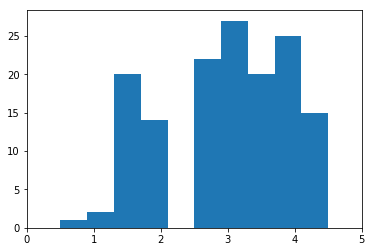

In [6]:
# Create a histogram of the Metacritic_norm_round column.
plt.xlim(0.0,5.0)
plt.hist(movie_reviews["Metacritic_norm_round"])

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

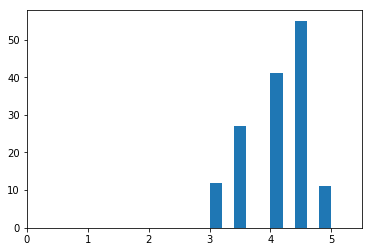

In [7]:
# Create a histogram of the Fandango_Stars column.
plt.xlim(0.0,5.5)
plt.hist(movie_reviews["Fandango_Stars"])

In the last screen, you may have noticed some differences between the Fandango and Metacritic scores. Metrics we've covered, including the mean, median, and standard deviation, allow you to quantify these differences. You can apply these metrics to the **Fandango_Stars** and **Metacritic_norm_round** columns to figure out how different they are.

In [8]:
# Calculate the mean of both Fandango_Stars and Metacritic_norm_round.
print("mean of Fandango_Stars =", movie_reviews["Fandango_Stars"].mean())
print("mean of Metacritic_norm_round =", movie_reviews["Metacritic_norm_round"].mean())

# Calculate the median of both Fandango_Stars and Metacritic_norm_round.
print("median of Fandango_Stars =", movie_reviews["Fandango_Stars"].median())
print("median of Metacritic_norm_round =", movie_reviews["Metacritic_norm_round"].median())

# Calculate the standard deviation of both Fandango_Stars and Metacritic_norm_round.
print("standard deviation of Fandango_Stars =", movie_reviews["Fandango_Stars"].std())
print("standard deviation of Metacritic_norm_round =", movie_reviews["Metacritic_norm_round"].std())

mean of Fandango_Stars = 4.089041095890411
mean of Metacritic_norm_round = 2.9726027397260273
median of Fandango_Stars = 4.0
median of Metacritic_norm_round = 3.0
standard deviation of Fandango_Stars = 0.5403859779787333
standard deviation of Metacritic_norm_round = 0.9909605613743364


Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

Fandango ratings in general appear to be higher than metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

We know the ratings tend to differ, but we don't know which movies tend to be the largest outliers. You can find this by making a scatterplot, then looking at which movies are far away from the others.

You can also subtract the **Fandango_Stars** column from the **Metacritic_norm_round** column, take the absolute value, and sort **movies** based on the difference to find the movies with the largest differences between their Metacritic and Fandango ratings.

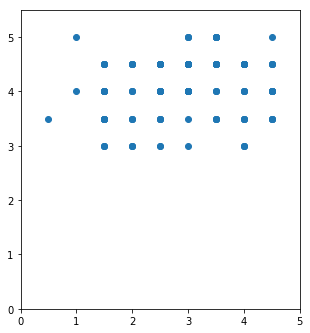

In [9]:
# Make a scatterplot that compares the Fandango_Stars column to the Metacritic_norm_round column.
plt.figure(figsize = (5,5.5))
plt.xlim(0.0,5.0)
plt.ylim(0.0,5.5)
plt.scatter(movie_reviews["Metacritic_norm_round"], movie_reviews["Fandango_Stars"])

In [10]:
# Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa.
# We can explore this further by finding the differences between the columns.

# Subtract the Fandango_Stars column from the Metacritic_norm_round column,
# and assign to a new column, fm_diff, in movies.

# Assign the absolute value of fm_diff to fm_diff.
# This will ensure that we don't only look at cases where Metacritic_norm_round is greater than Fandango_Stars.
fm_diff = abs(movie_reviews["Metacritic_norm_round"] - movie_reviews["Fandango_Stars"])

# Sort movies based on the fm_diff column, in descending order.
fm_diff.sort_values(ascending = False, inplace = True)

# Print out the top 5 movies with the biggest differences between Fandango_Stars and Metacritic_norm_round.
movie_reviews[["FILM","Fandango_Stars","Metacritic_norm_round",\
               "RT_user_norm","Metacritic_user_nom","Fandango_Ratingvalue","IMDB_norm"\
              ]].loc[fm_diff.index[:5]]

,FILM,Fandango_Stars,Metacritic_norm_round,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,IMDB_norm
3,Do You Believe? (2015),5.0,1.0,4.20,2.35,4.5,2.70
15,Taken 3 (2015),4.5,1.5,2.30,2.30,4.1,3.05
134,The Longest Ride (2015),4.5,1.5,3.65,2.40,4.5,3.60
47,Annie (2014),4.5,1.5,3.05,2.40,4.2,2.60
19,Pixels (2015),4.5,1.5,2.70,2.65,4.1,2.80


Let's see what the correlation coefficient between **Fandango_Stars** and **Metacritic_norm_round** is. This will help you determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

You can then create a linear regression to see what the predicted Fandango score would be based on the Metacritic score.

In [11]:
from scipy.stats.stats import pearsonr

In [12]:
# Calculate the r-value measuring the correlation between Fandango_Stars and Metacritic_norm_round
# using the scipy.stats.pearsonr function.
fandango_metacritic_corr = pearsonr(movie_reviews["Metacritic_norm_round"], movie_reviews["Fandango_Stars"])[0]
print(fandango_metacritic_corr)

0.178449190739


The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [13]:
from scipy.stats import linregress

In [14]:
# Use the scipy.stats.linregress function create a linear regression
# with Metacritic_norm_round as the x-values and Fandango_Stars as the y-values.
slope, intercept, r_value, p_value, stderr_slope = linregress(movie_reviews["Metacritic_norm_round"], movie_reviews["Fandango_Stars"])

# Predict what a movie that got a 3.0 in Metacritic would get on Fandango
# using the formula pred_3 = 3 * slope + intercept.
pred_3 = 3 * slope + intercept
print(pred_3)

4.09170715282


In the last screen, you created a linear regression for relating **Metacritic_norm_round** to **Fandango_Stars**. You can create a residual plot to better visualize how the line relates to the existing datapoints. This can help you see if two variables are linearly related or not.

In [15]:
# Predict what a movie that got a 1.0 in Metacritic would get on Fandango using the line from the last screen.
pred_1 = 1 * slope + intercept
print(pred_1)

3.89708499687


In [16]:
# Predict what a movie that got a 5.0 in Metacritic would get on Fandango using the line from the last screen.
pred_5 = 5 * slope + intercept
print(pred_5)

4.28632930877


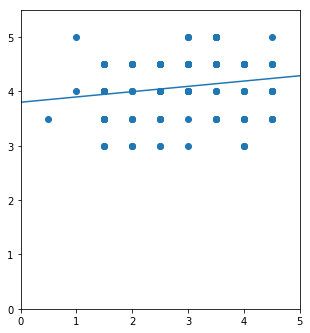

In [17]:
# Make a scatter plot using the scatter function in matplotlib.pyplot.
plt.figure(figsize = (5,5.5))
plt.xlim(0.0,5.0)
plt.ylim(0.0,5.5)
plt.scatter(movie_reviews["Metacritic_norm_round"], movie_reviews["Fandango_Stars"])

# On top of the scatter plot, use the plot function in matplotlib.pyplot to plot a line.
x = np.asarray([0, 5])
y = x * slope + intercept
plt.plot(x, y)